In [249]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats

In [250]:
df=pd.read_csv("MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [251]:
df.shape

(1259, 11)

In [252]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [253]:
df.duplicated().sum()

83

In [254]:
df.drop_duplicates(inplace=True)

In [255]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

**Inference**
* our dataset has 1259 rows and 11 columns
* Dataset has 5 categorical columns and 6 numerical columns which we will separate saparately as num_col and cat_col
* Dataset has duplicate rows which we have to drop to improve the performance of ML models 
* Dataset has null values in few columns 

### Univariate Analysis

In [256]:
df["BHK"].value_counts()

3     501
2     342
4     208
1      94
5      23
6       6
7       1
10      1
Name: BHK, dtype: int64

In [257]:
fig=px.bar(df,x=df["BHK"].value_counts().index,y=df["BHK"].value_counts().values,color=df["BHK"].unique()
           ,height=500,width=500,title="Value count for BHK")
fig.show()

In [258]:
df["Area"].value_counts()

900.0      66
1500.0     46
1800.0     44
1000.0     37
1600.0     35
           ..
852.0       1
1674.0      1
2025.0      1
24300.0     1
11050.0     1
Name: Area, Length: 315, dtype: int64

In [259]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [260]:
df["Bathroom"].value_counts()

2.0    511
3.0    327
1.0    143
4.0    129
5.0     56
6.0      6
7.0      3
Name: Bathroom, dtype: int64

In [261]:
fig=px.bar(df,x=df["Bathroom"].value_counts().index,y=df["Bathroom"].value_counts().values,
           color=df["Bathroom"].value_counts().index
           ,height=500,width=500,title="Value count for Bathroom")
fig.show()

In [262]:
df["Parking"].value_counts()

1.0      737
2.0      321
3.0       54
4.0       14
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: Parking, dtype: int64

In [263]:
fig=px.bar(df,x=df["Status"].value_counts().index,y=df["Status"].value_counts().values,
           color=df["Status"].value_counts().index
           ,height=500,width=500,title="Value count for Status")
fig.show()

In [264]:
fig=px.bar(df,x=df["Type"].value_counts().index,y=df["Type"].value_counts().values,
           color=df["Type"].value_counts().index
           ,height=500,width=500,title="Value count for Type")
fig.show()

In [265]:
fig=px.bar(df,x=df["Transaction"].value_counts().index,y=df["Transaction"].value_counts().values,
           color=df["Transaction"].value_counts().index
           ,height=500,width=500,title="Value count for Transaction")
fig.show()

In [266]:
fig=px.bar(df,x=df["Furnishing"].value_counts().index,y=df["Furnishing"].value_counts().values,
           color=df["Furnishing"].value_counts().index
           ,height=500,width=500,title="Value count for Furnishing")
fig.show()

In [267]:
df["Locality"].nunique()

365

In [268]:
df["Area"].value_counts()

900.0      66
1500.0     46
1800.0     44
1000.0     37
1600.0     35
           ..
852.0       1
1674.0      1
2025.0      1
24300.0     1
11050.0     1
Name: Area, Length: 315, dtype: int64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1176 non-null   float64
 1   BHK          1176 non-null   int64  
 2   Bathroom     1175 non-null   float64
 3   Furnishing   1171 non-null   object 
 4   Locality     1176 non-null   object 
 5   Parking      1145 non-null   float64
 6   Price        1176 non-null   int64  
 7   Status       1176 non-null   object 
 8   Transaction  1176 non-null   object 
 9   Type         1171 non-null   object 
 10  Per_Sqft     949 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 110.2+ KB


In [270]:
df.describe([0.01,0.02,0.03,0.04,0.05,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99,1])

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1176.000000,1176.000000,1175.000000,1145.000000,1.176000e+03,949.000000
mean,1447.542711,2.789966,2.552340,1.979039,2.109173e+07,15817.306639
std,1487.658687,0.960993,1.053319,6.493508,2.523174e+07,21761.574205
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
1%,70.000000,1.000000,1.000000,1.000000,1.500000e+06,2778.000000
2%,199.000000,1.000000,1.000000,1.000000,1.675000e+06,3292.600000
3%,350.000000,1.000000,1.000000,1.000000,1.800000e+06,3444.000000
4%,360.000000,1.000000,1.000000,1.000000,1.950000e+06,3524.000000
5%,380.000000,1.000000,1.000000,1.000000,2.000000e+06,3524.000000
25%,800.000000,2.000000,2.000000,1.000000,5.800000e+06,6471.000000


In [271]:
num_col=df.dtypes[df.dtypes!="object"].index
num_col

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'], dtype='object')

In [272]:

cat_col=df.dtypes[df.dtypes=="object"].index
cat_col

Index(['Furnishing', 'Locality', 'Status', 'Transaction', 'Type'], dtype='object')

In [273]:
for i in num_col:
    fig=px.box(df[i],height=400,width=400,title=i)
    fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



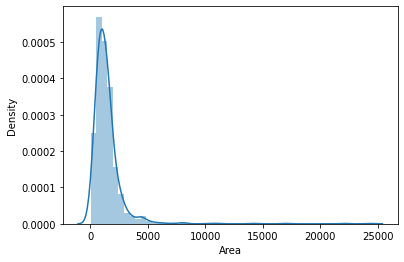

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



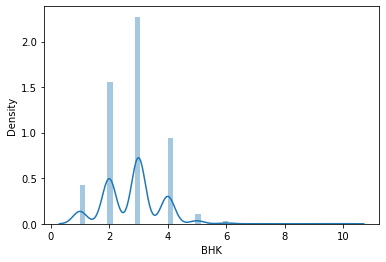

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



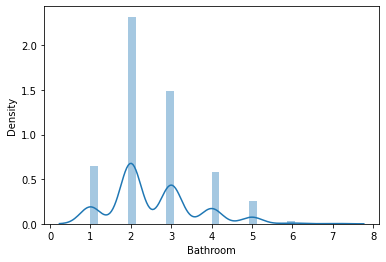

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



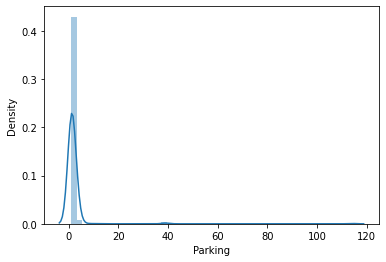

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



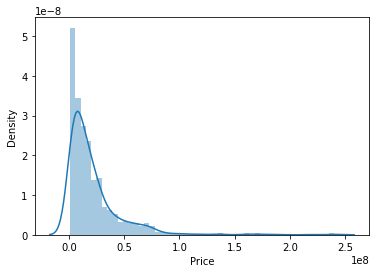

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



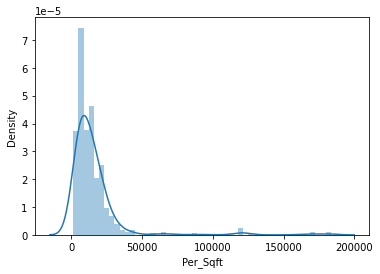

In [274]:
for i in num_col:
    sns.distplot(df[i])
    plt.show()

**Inference**
* As seen from the boxplot and distplot we conclude that numerical columns has outliers in the upper end 

### Bivariate Analysis

In [275]:
df.groupby("Locality").agg([np.median]).T

C:\Users\user\AppData\Local\Temp\ipykernel_13128\2939134496.py:1: FutureWarning:

['Furnishing', 'Status', 'Transaction', 'Type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,Locality,"APL Builder Floor, Greater Kailash 1","Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor","Ahinsha Vatika, Ram Nagar, Shahdara",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,"Vijay Enclave, Mahavir Enclave","Vijay Vihar, Rohini","Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Vishwas Nagar, Shahdara","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara","Zakir Nagar, New Friends Colony","mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar"
Area,median,2700.0,1525.0,1400.0,540.0,750.0,540.0,1150.0,1360.0,750.0,1170.0,...,360.0,900.0,1100.0,825.0,1000.0,1017.0,1300.0,720.0,540.0,400.0
BHK,median,4.0,3.0,3.5,3.0,2.0,2.0,2.0,2.5,2.0,3.0,...,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
Bathroom,median,3.0,2.0,3.5,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
Parking,median,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.5,1.0,...,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0
Price,median,60000000.0,14950000.0,11050000.0,4950000.0,3800000.0,3000000.0,7300000.0,17000000.0,12250000.0,7200000.0,...,2200000.0,4500000.0,22500000.0,8900000.0,4620000.0,6500000.0,15000000.0,8000000.0,1500000.0,9000000.0
Per_Sqft,median,22222.0,NaN,9655.0,19841.0,10320.0,5000.0,6347.0,12500.0,14444.0,8060.0,...,42222.0,6154.0,22000.0,8129.5,4620.0,6526.0,11538.0,10288.0,2778.0,14550.0


In [276]:
fig=px.box(df,x="BHK",y="Price",color = "BHK",template="ggplot2",width=600,height=600,
                 title="Outliers in Price wrt BHK")
fig.show()

In [277]:
fig=px.box(df,x="Transaction",y="Price",color = "Transaction",template="ggplot2",width=600,height=600,
                 title="Outliers in Price wrt Transaction")
fig.show()

In [278]:
fig=px.box(df,x="Status",y="Price",color = "Status",template="ggplot2",width=600,height=600,
                 title="Outliers in Price wrt Status")
fig.show()

In [279]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [280]:
fig=px.scatter(df,x="Area",y="Price",height=500,width=500,template="plotly",title=
              "Area v/s Price")
fig.show()

In [281]:
fig=px.scatter(df,x="BHK",y="Price",height=500,width=500,template="plotly",title=
              "BHK v/s Price")
fig.show()

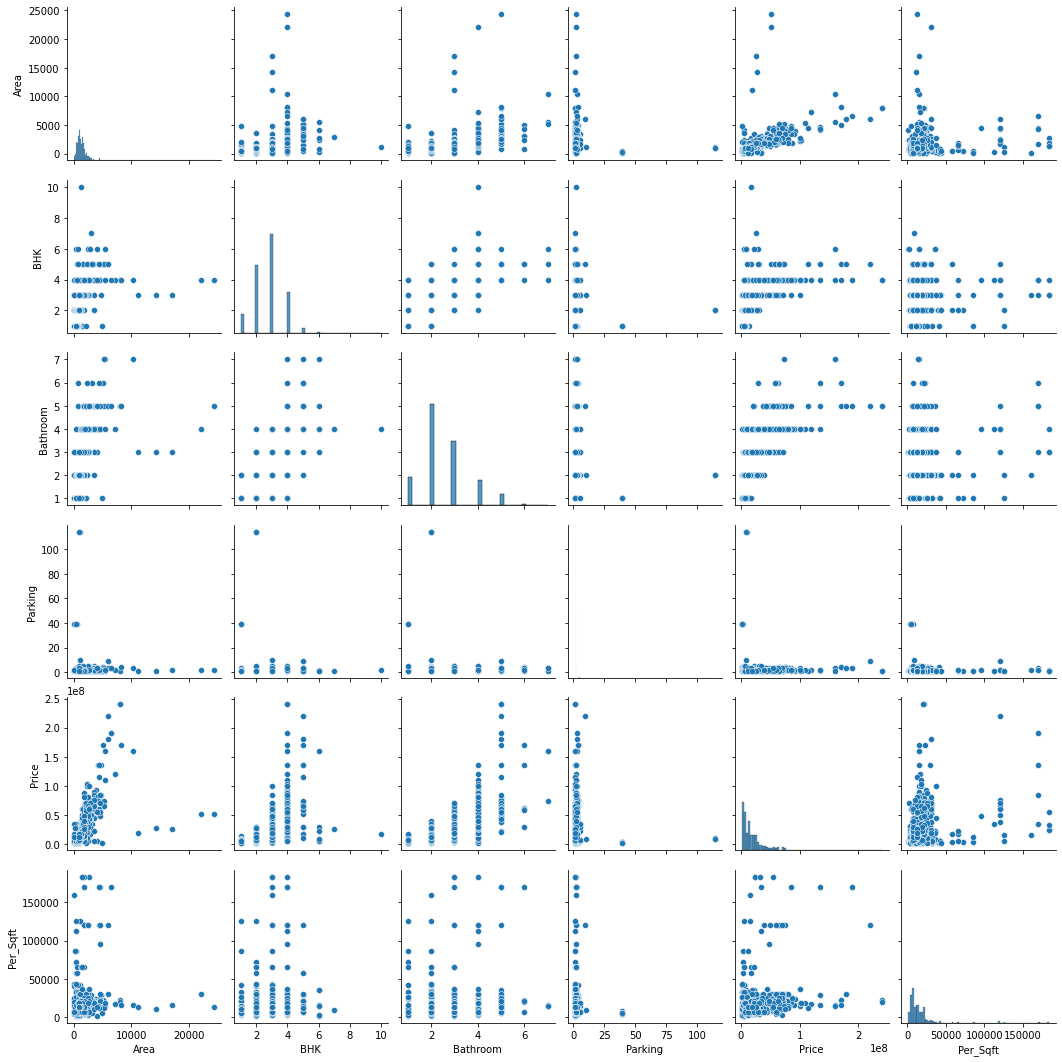

In [282]:
sns.pairplot(df)
plt.show()

In [283]:
df.describe([0.01,0.02,0.03,0.04,0.05,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99,1])

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1176.000000,1176.000000,1175.000000,1145.000000,1.176000e+03,949.000000
mean,1447.542711,2.789966,2.552340,1.979039,2.109173e+07,15817.306639
std,1487.658687,0.960993,1.053319,6.493508,2.523174e+07,21761.574205
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
1%,70.000000,1.000000,1.000000,1.000000,1.500000e+06,2778.000000
2%,199.000000,1.000000,1.000000,1.000000,1.675000e+06,3292.600000
3%,350.000000,1.000000,1.000000,1.000000,1.800000e+06,3444.000000
4%,360.000000,1.000000,1.000000,1.000000,1.950000e+06,3524.000000
5%,380.000000,1.000000,1.000000,1.000000,2.000000e+06,3524.000000
25%,800.000000,2.000000,2.000000,1.000000,5.800000e+06,6471.000000


### Outlier treatment

In [284]:
def out_treat(x):
    x=x.clip(upper=x.quantile(0.98))
    return(x)

In [285]:
df[num_col]=df[num_col].apply(out_treat)

In [286]:
df.describe([0.01,0.02,0.03,0.04,0.05,0.25,0.50,0.75,0.95,0.96,0.97,0.98,0.99,1])

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1176.000000,1176.000000,1175.000000,1145.000000,1.176000e+03,949.000000
mean,1366.676215,2.778912,2.542128,1.461135,2.000031e+07,15134.529989
std,888.208656,0.919073,1.021767,0.718463,1.976883e+07,17394.711834
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
1%,70.000000,1.000000,1.000000,1.000000,1.500000e+06,2778.000000
2%,199.000000,1.000000,1.000000,1.000000,1.675000e+06,3292.600000
3%,350.000000,1.000000,1.000000,1.000000,1.800000e+06,3444.000000
4%,360.000000,1.000000,1.000000,1.000000,1.950000e+06,3524.000000
5%,380.000000,1.000000,1.000000,1.000000,2.000000e+06,3524.000000
25%,800.000000,2.000000,2.000000,1.000000,5.800000e+06,6471.000000


### Missing Value treatment

In [287]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         1
Furnishing       5
Locality         0
Parking         31
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       227
dtype: int64

In [288]:
print("Categorical columns: ",cat_col)

Categorical columns:  Index(['Furnishing', 'Locality', 'Status', 'Transaction', 'Type'], dtype='object')


In [289]:
df["Bathroom"].mode().max()


2.0

In [290]:
df["Furnishing"].mode().max()


'Semi-Furnished'

In [291]:
df["Bathroom"].fillna(2.0,inplace=True)
df["Furnishing"].fillna("Semi-Furnished",inplace=True)
df["Parking"].fillna(df["Parking"].median(),inplace=True)
df["Type"].fillna(df["Type"].mode().max(),inplace=True)
df["Per_Sqft"].fillna(df["Per_Sqft"].median(),inplace=True)


In [292]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

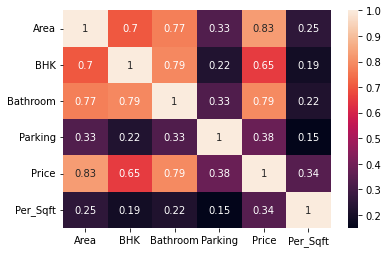

In [293]:
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

**Inference**
* As seen from the pair plot that there is slight linear relationship amongst the features
* since the Dataset has outliers at the upper end so we clip them at 98 percentile 
* For the missing values we fill the nullvalues with the mode for categorical columns and median for the numerical columns 
* as seen from the correlation plot we conclude that there is correlation amongst the variables

In [294]:
df.groupby("BHK").agg({"Price":["mean"]})

,Price
,mean
BHK,
1.0,2.970638e+06
2.0,8.662982e+06
3.0,1.914830e+07
4.0,4.370188e+07
5.0,5.145484e+07


In [295]:
df.groupby("Parking").agg({"Price":["mean"]})

,Price
,mean
Parking,
1.0,1.414164e+07
2.0,2.873470e+07
3.0,4.934722e+07
4.0,2.336364e+07


In [296]:
df.groupby("Furnishing").agg({"Price":["mean"]})

,Price
,mean
Furnishing,
Furnished,1.683805e+07
Semi-Furnished,2.175250e+07
Unfurnished,1.809961e+07


In [297]:
ct=pd.crosstab(df["Type"],df["Furnishing"])
ct

Furnishing,Furnished,Semi-Furnished,Unfurnished
Type,,,
Apartment,96,274,158
Builder_Floor,78,398,172


**Decision Rule**
* Chi Square Test
* Type Vs Furnishing

* Null Hypo (Ho) : Type and Fornishing are independent
* Alter Hypo(Ha) : Type and Furnishing  are associated
* CI - 95% 
* Alpha=.05
* Decision Rule :
*    if p value >= Alpha , Accept Null hypo
*    If p value < Alpha , Reject Null Hyp - Accept alternative Hypothesis

In [298]:
stats.chi2_contingency(ct)  # since here p-value<0.05 then we fail to accept null hypothesis

(13.229815967054739,
 0.0013402381143528396,
 2,
 array([[ 78.12244898, 301.71428571, 148.16326531],
        [ 95.87755102, 370.28571429, 181.83673469]]))

In [299]:
ct=pd.crosstab(df["Locality"],df["Furnishing"])
stats.chi2_contingency(ct)  # since here p-value<0.05 then we fail to accept null hypothesis

(1056.2613518907926,
 1.6364828506019234e-14,
 728,
 array([[ 0.14795918,  0.57142857,  0.28061224],
        [ 0.8877551 ,  3.42857143,  1.68367347],
        [ 0.29591837,  1.14285714,  0.56122449],
        ...,
        [ 4.29081633, 16.57142857,  8.1377551 ],
        [ 0.14795918,  0.57142857,  0.28061224],
        [ 0.14795918,  0.57142857,  0.28061224]]))

In [300]:
ct=pd.crosstab(df["Status"],df["Furnishing"])
stats.chi2_contingency(ct)   # since here p-value<0.05 then we fail to accept null hypothesis

(5.37424913414591,
 0.06807640735280489,
 2,
 array([[  9.0255102 ,  34.85714286,  17.11734694],
        [164.9744898 , 637.14285714, 312.88265306]]))

In [301]:
ct=pd.crosstab(df["Status"],df["Transaction"])
stats.chi2_contingency(ct)    # since here p-value<0.05 then we fail to accept null hypothesis

(66.48196566752111,
 3.5310945882726043e-16,
 1,
 array([[ 22.56377551,  38.43622449],
        [412.43622449, 702.56377551]]))

### Model Building

In [302]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Label encoding of categorical columns

In [303]:
lb=LabelEncoder()
for i in cat_col:
    df[i]=lb.fit_transform(df[i])

In [304]:
df.dtypes

Area           float64
BHK            float64
Bathroom       float64
Furnishing       int32
Locality         int32
Parking        float64
Price          float64
Status           int32
Transaction      int32
Type             int32
Per_Sqft       float64
dtype: object

In [305]:
x=df.drop(columns=["Price"])
y=df["Price"]

In [342]:
x.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
0,800.0,3.0,2.0,1,283,1.0,1,0,1,11111.0
1,750.0,2.0,2.0,1,139,1.0,1,0,0,6667.0
2,950.0,2.0,2.0,0,49,1.0,1,1,0,6667.0
3,600.0,2.0,2.0,1,281,1.0,1,1,1,6667.0
4,650.0,2.0,2.0,1,282,1.0,1,0,1,6667.0


#### train-test split

In [306]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(882, 10)
(294, 10)
(882,)
(294,)


In [307]:
def model_gen(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    print("Training score: ",model.score(x_train,y_train))
    print("Testing score: ",model.score(x_test,y_test))
    y_pred=model.predict(x_test)
    MSE= mean_squared_error(y_test,y_pred)
    MAE= mean_absolute_error(y_test,y_pred)
    RMSE=np.sqrt(MSE)
    R2=r2_score(y_test,y_pred)
    print("Mean Absolute Error(MAE): ",MAE)
    print("Mean Squared Error(MSE): ",MSE)
    print("Root Mean Squared Error(RMSE): ",RMSE)
    print("R2 score: ",R2)
    return(MAE,MSE,RMSE,R2)

In [308]:
from sklearn.linear_model import LinearRegression

In [309]:
m1=LinearRegression()
m1_mae,m1_mse,m1_rmse,m1_r2=model_gen(m1,x_train,y_train,x_test,y_test)

Training score:  0.7763312546249075
Testing score:  0.7622399222010731
Mean Absolute Error(MAE):  6757125.285879648
Mean Squared Error(MSE):  102899780732284.67
Root Mean Squared Error(RMSE):  10143952.91453409
R2 score:  0.7622399222010731


In [310]:
r1=pd.DataFrame({"ModelName":"Linear Regression","MAE":m1_mae,"MSE":m1_mse,
                 "RMSE":m1_rmse,"R2score":m1_r2},index=[0])

In [311]:
from sklearn.linear_model import Ridge,Lasso

In [312]:
m2=Ridge(alpha=0.0001)
m2_mae,m2_mse,m2_rmse,m2_r2=model_gen(m2,x_train,y_train,x_test,y_test)

Training score:  0.7763312546248953
Testing score:  0.7622399250589218
Mean Absolute Error(MAE):  6757125.134411758
Mean Squared Error(MSE):  102899779495441.17
Root Mean Squared Error(RMSE):  10143952.853569519
R2 score:  0.7622399250589218


In [313]:
m3=Lasso(alpha=0.1)
m3_mae,m3_mse,m3_rmse,m3_r2=model_gen(m3,x_train,y_train,x_test,y_test)

Training score:  0.7763312546249065
Testing score:  0.76223992384025
Mean Absolute Error(MAE):  6757125.259199654
Mean Squared Error(MSE):  102899780022868.08
Root Mean Squared Error(RMSE):  10143952.879566628
R2 score:  0.76223992384025


#### decision tree

In [314]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_text

In [315]:
m4=DecisionTreeRegressor(criterion="squared_error",max_depth=5,min_samples_split=15,min_samples_leaf=10)
m4_mae,m4_mse,m4_rmse,m4_r2=model_gen(m4,x_train,y_train,x_test,y_test)

Training score:  0.8451176704407478
Testing score:  0.7903616139728555
Mean Absolute Error(MAE):  6048803.560541928
Mean Squared Error(MSE):  90729041456263.23
Root Mean Squared Error(RMSE):  9525179.339847792
R2 score:  0.7903616139728555


In [316]:
r2=pd.DataFrame({"ModelName":"Decision Tree","MAE":m4_mae,"MSE":m4_mse,
                 "RMSE":m4_rmse,"R2score":m4_r2},index=[1])

In [198]:
from sklearn.model_selection import GridSearchCV

In [92]:
params={"criterion":["squared_error","absolute_error"],
       "max_depth":[5,7,9,11,13,15],
       "min_samples_split":[20,50,30,40],
       "min_samples_leaf":[5,10,15,20,25]}

In [97]:
dt=DecisionTreeRegressor()
gv=GridSearchCV(estimator=dt,param_grid=params,cv=10,n_jobs=-1)
gv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [20, 50, 30, 40]})

In [199]:
gv.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 100,
 'oob_score': True}

In [317]:
m5=DecisionTreeRegressor(criterion="absolute_error",max_depth=7,min_samples_split=10,min_samples_leaf=20)
m5_mae,m5_mse,m5_rmse,m5_r2=model_gen(m5,x_train,y_train,x_test,y_test)

Training score:  0.8083869233555343
Testing score:  0.7747874452358126
Mean Absolute Error(MAE):  5812959.183673469
Mean Squared Error(MSE):  97469359523809.53
Root Mean Squared Error(RMSE):  9872657.166326072
R2 score:  0.7747874452358126


In [318]:
r3=pd.DataFrame({"ModelName":"Decision Tree with tuning","MAE":m5_mae,"MSE":m5_mse,
                 "RMSE":m5_rmse,"R2score":m5_r2},index=[3])

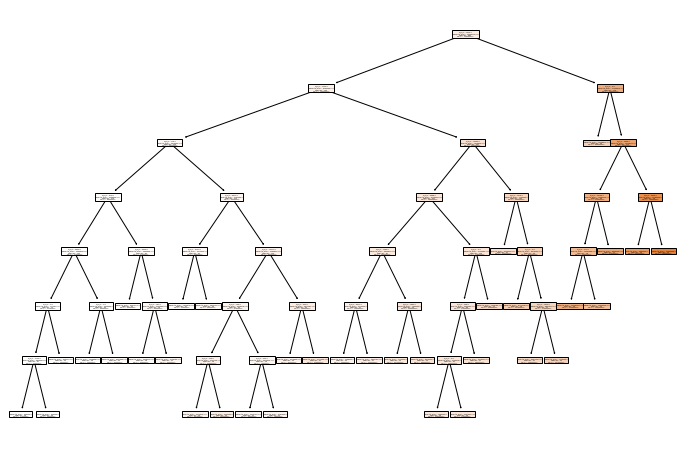

In [319]:
plt.figure(figsize=(12,8))
tree.plot_tree(m5,filled=True)
plt.show()

#### Random Forest

In [320]:
from sklearn.ensemble import RandomForestRegressor

In [321]:
m6=RandomForestRegressor(criterion='squared_error',n_estimators=100,max_depth=10,min_samples_split=15)
m6_mae,m6_mse,m6_rmse,m6_r2=model_gen(m6,x_train,y_train,x_test,y_test)

Training score:  0.9203289741452273
Testing score:  0.8439676461981636
Mean Absolute Error(MAE):  5270215.761051078
Mean Squared Error(MSE):  67528977707222.555
Root Mean Squared Error(RMSE):  8217601.700449016
R2 score:  0.8439676461981636


In [322]:
r4=pd.DataFrame({"ModelName":"Random forest","MAE":m6_mae,"MSE":m6_mse,
                 "RMSE":m6_rmse,"R2score":m6_r2},index=[4])

In [108]:
params={"criterion":['squared_error','absolute_error'],
       "n_estimators":[100,130,170,210,250],
        "max_depth":[5,7,9,11,13,15],
       "min_samples_split":[20,50,30,40],
       "min_samples_leaf":[5,10,15,20,25],
       "bootstrap" : [True],
       "oob_score": [True]}

In [110]:
rf=RandomForestRegressor()
gv=GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=-1)
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'min_samples_split': [20, 50, 30, 40],
                         'n_estimators': [100, 130, 170, 210, 250],
                         'oob_score': [True]})

In [111]:
gv.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 100,
 'oob_score': True}

In [323]:
m7=RandomForestRegressor(criterion='absolute_error',n_estimators=100,max_depth=15,min_samples_split=20,
                         bootstrap=True,oob_score=True)
m7_mae,m7_mse,m7_rmse,m7_r2=model_gen(m7,x_train,y_train,x_test,y_test)

Training score:  0.9001534593070062
Testing score:  0.8398603926066466
Mean Absolute Error(MAE):  5150766.326530612
Mean Squared Error(MSE):  69306549021513.6
Root Mean Squared Error(RMSE):  8325055.4966026265
R2 score:  0.8398603926066466


In [324]:
r5=pd.DataFrame({"ModelName":"Random forest with tuning","MAE":m7_mae,"MSE":m7_mse,
                 "RMSE":m7_rmse,"R2score":m7_r2},index=[5])

In [325]:
imp=m7.feature_importances_
print(imp)

[0.62180135 0.01307827 0.14260102 0.00610282 0.04037571 0.01170029
 0.00656854 0.011571   0.01318505 0.13301595]


In [326]:
var=x.columns
f1=pd.DataFrame({"Variables":var,"FeatImp":imp})
f1

,Variables,FeatImp
0,Area,0.621801
1,BHK,0.013078
2,Bathroom,0.142601
3,Furnishing,0.006103
4,Locality,0.040376
5,Parking,0.011700
6,Status,0.006569
7,Transaction,0.011571
8,Type,0.013185
9,Per_Sqft,0.133016


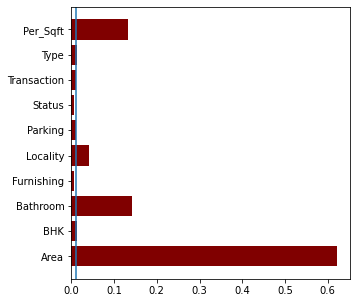

In [327]:
plt.figure(figsize=(5,5))
plt.barh(var,imp,color='maroon')
plt.axvline(x=0.01)
plt.show()

#### XGBoost

In [328]:
from xgboost import XGBRegressor

In [329]:
m8=XGBRegressor(n_estimators=100,max_depth=4,reg_lambda=.2,eta=0.3,eval_metric='rmse',gamma=0.5,objectives='reg:squarederror',
                random_state=0,reg_alpha=0)
m8_mae,m8_mse,m8_rmse,m8_r2=model_gen(m8,x_train,y_train,x_test,y_test)

[20:36:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "objectives" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training score:  0.9878847589057586
Testing score:  0.8529531241129436
Mean Absolute Error(MAE):  5012259.246173469
Mean Squared Error(MSE):  63640167963529.63
Root Mean Squared Error(RMSE):  7977478.797435292
R2 score:  0.8529531241129436


In [330]:
r6=pd.DataFrame({"ModelName":"XGBoost","MAE":m8_mae,"MSE":m8_mse,
                 "RMSE":m8_rmse,"R2score":m8_r2},index=[6])


### Adaboost

In [331]:
from sklearn.ensemble import AdaBoostRegressor

In [332]:
addt=DecisionTreeRegressor(criterion="squared_error",max_depth=5,min_samples_split=15,min_samples_leaf=10)
m9=AdaBoostRegressor(base_estimator=addt,n_estimators=100)
m9_mae,m9_mse,m9_rmse,m9_r2=model_gen(m9,x_train,y_train,x_test,y_test)

Training score:  0.8940277829858428
Testing score:  0.7831195784586907
Mean Absolute Error(MAE):  7062533.52802847
Mean Squared Error(MSE):  93863309720985.1
Root Mean Squared Error(RMSE):  9688307.887396287
R2 score:  0.7831195784586907


In [333]:
r7=pd.DataFrame({"ModelName":"Adaboost with decisiontree","MAE":m9_mae,"MSE":m9_mse,
                 "RMSE":m9_rmse,"R2score":m9_r2},index=[7])

In [334]:
adrf=RandomForestRegressor(criterion='squared_error',n_estimators=100,max_depth=10,min_samples_split=15)
m10=AdaBoostRegressor(base_estimator=adrf,n_estimators=50)
m10_mae,m10_mse,m10_rmse,m10_r2=model_gen(m10,x_train,y_train,x_test,y_test)

Training score:  0.964107732651527
Testing score:  0.8336261690478831
Mean Absolute Error(MAE):  5766375.695538285
Mean Squared Error(MSE):  72004648059718.47
Root Mean Squared Error(RMSE):  8485555.259363906
R2 score:  0.8336261690478831


In [335]:
r8=pd.DataFrame({"ModelName":"Adaboost with Random forest","MAE":m10_mae,"MSE":m10_mse,
                 "RMSE":m10_rmse,"R2score":m10_r2},index=[8])

In [336]:
re=[r1,r2,r3,r4,r5,r6,r7,r8]
res=pd.concat(re)

In [337]:
res

,ModelName,MAE,MSE,RMSE,R2score
0,Linear Regression,6.757125e+06,1.028998e+14,1.014395e+07,0.762240
1,Decision Tree,6.048804e+06,9.072904e+13,9.525179e+06,0.790362
3,Decision Tree with tuning,5.812959e+06,9.746936e+13,9.872657e+06,0.774787
4,Random forest,5.270216e+06,6.752898e+13,8.217602e+06,0.843968
5,Random forest with tuning,5.150766e+06,6.930655e+13,8.325055e+06,0.839860
6,XGBoost,5.012259e+06,6.364017e+13,7.977479e+06,0.852953
7,Adaboost with decisiontree,7.062534e+06,9.386331e+13,9.688308e+06,0.783120
8,Adaboost with Random forest,5.766376e+06,7.200465e+13,8.485555e+06,0.833626
